# 4.10 Coding Etiquette & Excel Reporting

## Part 2

In [8]:
# Importing libraries
import pandas as pd 
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [9]:
# import data frame
path = r'D:\02.2022_Instacart Basket Analysis'

In [10]:
df = pd.read_pickle(os.path.join(path,'02 Data','Prepared Data','customer_orders_production_merge.pkl'))

In [4]:
df.shape

(29266394, 31)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29266394 entries, 0 to 30624913
Data columns (total 31 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   user_id                 int32  
 1   gender                  object 
 2   state                   object 
 3   age                     int8   
 4   n_dependants            int8   
 5   family_status           object 
 6   income                  int32  
 7   order_id                int32  
 8   order_number            int8   
 9   orders_day_of_week      int8   
 10  order_time_of_day       int8   
 11  days_since_prior_order  float16
 12  first_order             bool   
 13  product_id              int32  
 14  add_to_cart_order       int16  
 15  reordered               int8   
 16  product_name            object 
 17  aisle_id                int8   
 18  department_id           int8   
 19  prices                  float16
 20  busiest_day             object 
 21  busiest_days            objec

### 5. The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)
### 6. Create an appropriate visualization to show the distribution of profiles.

In [21]:
# Import data frame
departments = pd.read_csv(os.path.join(path,'02 Data','Prepared Data','df_dep_t_new_wrangled.csv'))

In [22]:
# Check the data frame
departments.head()

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [8]:
# Change inapropriate column name
departments.rename(columns = {'Unnamed: 0':'department_id'}, inplace = True)

In [9]:
departments.shape

(21, 2)

In [10]:
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [11]:
# Merge df with departments 
final_df = df.merge(departments, on = ['department_id'], how = 'inner')

In [12]:
final_df.head()

,user_id,gender,state,age,n_dependants,family_status,income,order_id,order_number,orders_day_of_week,...,busiest_period_of_day,max_order,loyalty_flag,spending,spending_flag,frequency,frequency_flag,region,activity_flag,department
0,26711,Female,Missouri,48,3,married,165665,2543867,5,1,...,Average orders,8,New customer,7.988281,Low spender,19.0,Regular customer,Midwest,normal_activity,beverages
1,26711,Female,Missouri,48,3,married,165665,1285508,7,5,...,Most orders,8,New customer,7.988281,Low spender,19.0,Regular customer,Midwest,normal_activity,beverages
2,26711,Female,Missouri,48,3,married,165665,2578584,8,1,...,Most orders,8,New customer,7.988281,Low spender,19.0,Regular customer,Midwest,normal_activity,beverages
3,33890,Female,New Mexico,36,0,single,59285,1044841,3,6,...,Most orders,12,Regular customer,7.058594,Low spender,26.0,Non-frequent customer,West,normal_activity,beverages
4,33890,Female,New Mexico,36,0,single,59285,474720,4,1,...,Average orders,12,Regular customer,7.058594,Low spender,26.0,Non-frequent customer,West,normal_activity,beverages


In [13]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29266394 entries, 0 to 29266393
Data columns (total 32 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   user_id                 int32  
 1   gender                  object 
 2   state                   object 
 3   age                     int8   
 4   n_dependants            int8   
 5   family_status           object 
 6   income                  int32  
 7   order_id                int32  
 8   order_number            int8   
 9   orders_day_of_week      int8   
 10  order_time_of_day       int8   
 11  days_since_prior_order  float16
 12  first_order             bool   
 13  product_id              int32  
 14  add_to_cart_order       int16  
 15  reordered               int8   
 16  product_name            object 
 17  aisle_id                int8   
 18  department_id           int8   
 19  prices                  float16
 20  busiest_day             object 
 21  busiest_days            objec

#### Age

In [14]:
# Layout and sort the unique age values
Age = final_df['age'].unique()

In [15]:
Age.sort()

In [16]:
print(Age)

[18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65
 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81]


Our customer's age is between 18 - 81 years old. 

In [17]:
# Create age_group by loc functions
final_df.loc[(final_df['age'] >= 18) & (final_df['age'] <= 24), 'age_group'] = '18-24'
final_df.loc[(final_df['age'] >= 25) & (final_df['age'] <= 34), 'age_group'] = '25-34'
final_df.loc[(final_df['age'] >= 35) & (final_df['age'] <= 44), 'age_group'] = '35-44'
final_df.loc[(final_df['age'] >= 45) & (final_df['age'] <= 54), 'age_group'] = '45-54'
final_df.loc[(final_df['age'] >= 55) & (final_df['age'] <= 64), 'age_group'] = '55-64'
final_df.loc[(final_df['age'] >= 65) & (final_df['age'] <= 74), 'age_group'] = '65-74'
final_df.loc[final_df['age'] >= 75, 'age_group'] = '> 75'

In [18]:
# Check the result of loc functions
final_df['age_group'].value_counts(dropna = False)

45-54    4612820
35-44    4578141
55-64    4561909
25-34    4542103
65-74    4518387
18-24    3233267
> 75     3219767
Name: age_group, dtype: int64

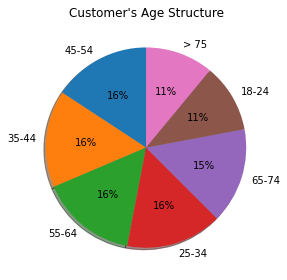

In [19]:
# Pie CHart
Age_group_pie = final_df['age_group'].value_counts().plot(kind='pie',startangle=90,autopct = '%1.0f%%',shadow=True,ylabel='')
Age_group_pie.set_title("Customer's Age Structure")
plt.tight_layout()
Age_group_pie.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'age_group_pie.png'))

#### Income

In [20]:
# Layout and sort the unique income values
Income = final_df['income'].unique()

In [21]:
Income.sort()

In [22]:
print(Income)

[ 25903  25911  25941 ... 590790 591089 593901]


Our customer's income is between 25903 - 593901. 

In [23]:
# Create income_group by loc functions
final_df.loc[final_df['income'] < 50000, 'income_group'] = 'low <50K'
final_df.loc[(final_df['income'] >= 50000) & (final_df['income'] < 100000), 'income_group'] = 'low/middle 50-100K'
final_df.loc[(final_df['income'] >= 100000) & (final_df['income'] < 150000), 'income_group'] = 'middle/high 100-150K'
final_df.loc[(final_df['income'] >= 150000), 'income_group'] = 'high >150K'

In [24]:
# Check the loc functions
final_df['income_group'].value_counts(dropna = False)

low/middle 50-100K      12665701
middle/high 100-150K     9761398
high >150K               3670517
low <50K                 3168778
Name: income_group, dtype: int64

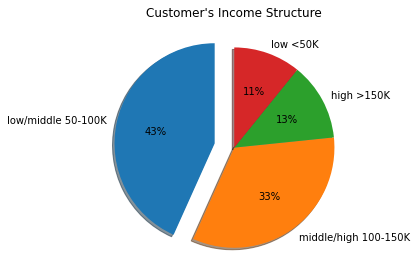

In [25]:
# Pie chart
myexplode = [0.2, 0, 0, 0]
Income_pie = final_df['income_group'].value_counts().plot(kind='pie',startangle=90,autopct = '%1.0f%%',shadow=True,ylabel='',explode=myexplode)

Income_pie.set_title("Customer's Income Structure")
plt.tight_layout()

Income_pie.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'income_pie.png'))

People with medium income use the app the most. 

#### Family status

In [26]:
# Descriptive Analysis of family status
final_df['family_status'].value_counts(dropna = False)

married                             20550046
single                               4801195
divorced/widowed                     2510202
living with parents and siblings     1404951
Name: family_status, dtype: int64

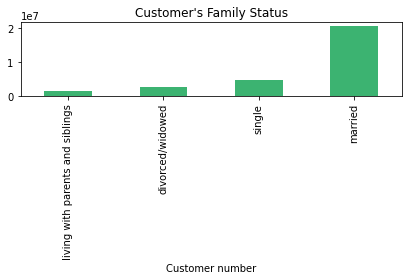

In [27]:
# Bar chart
Famil_status_barh = final_df['family_status'].value_counts().sort_values(ascending=True).plot.bar(color=['mediumseagreen'])

Famil_status_barh.set_title("Customer's Family Status")
plt.xlabel("Customer number")
plt.ylabel("")
plt.tight_layout()

Famil_status_barh.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'famil_status_barh.png'))

Most customers are married. 

#### n_dependant

In [28]:
# Descriptive Analysis of n_dependants
final_df['n_dependants'].value_counts(dropna = False)

3    7336969
2    7317417
0    7311397
1    7300611
Name: n_dependants, dtype: int64

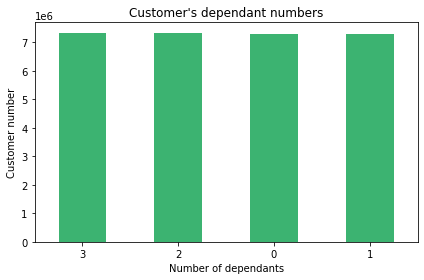

In [29]:
# Bar chart
n_dependants_bar = final_df['n_dependants'].value_counts().plot.bar(color=['mediumseagreen'], rot = 0)

n_dependants_bar.set_title("Customer's dependant numbers")
plt.xlabel("Number of dependants")
plt.ylabel("Customer number")
plt.tight_layout()

n_dependants_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'n_dependants_bar.png'))

No significant result is found. 

#### Create customer profile

In [30]:
# Customer Profile
final_df.loc[final_df['age'] >=65,'customer_profile'] = 'retired'

final_df.loc[(final_df['age'] <65) & (final_df['family_status'] != 'married') & (final_df['n_dependants'] == 0),'customer_profile'] = 'single adult, no kid(s)'
final_df.loc[(final_df['age'] <65) & (final_df['family_status'] != 'married') & (final_df['n_dependants'] != 0),'customer_profile'] = 'single adult, with kid(s)'

final_df.loc[(final_df['age'] <65) & (final_df['family_status'] == 'married') & (final_df['n_dependants'] == 0),'customer_profile'] = 'married, no kid(s)'
final_df.loc[(final_df['age'] <65) & (final_df['family_status'] == 'married') & (final_df['n_dependants'] != 0),'customer_profile'] = 'married, with kid(s)'

final_df.loc[(final_df['age'] >= 18)& (final_df['age'] <=24) & (final_df['n_dependants'] != 0),'customer_profile'] = 'young parent'

In [31]:
final_df['customer_profile'].value_counts(dropna = False)

married, with kid(s)       13674895
retired                     7738154
single adult, no kid(s)     5396115
young parent                2457230
Name: customer_profile, dtype: int64

In [32]:
# Customer Profile without unnecessary categories
final_df.loc[final_df['age'] >=65,'customer_profile'] = 'retired'

final_df.loc[(final_df['age'] <65) & (final_df['family_status'] != 'married') & (final_df['n_dependants'] == 0),'customer_profile'] = 'single adult'

final_df.loc[(final_df['age'] <65) & (final_df['family_status'] == 'married') & (final_df['n_dependants'] != 0),'customer_profile'] = 'typical married parent'

final_df.loc[(final_df['age'] >= 18)& (final_df['age'] <=24) & (final_df['n_dependants'] != 0),'customer_profile'] = 'young parent'

In [33]:
final_df['customer_profile'].value_counts(dropna = False)

typical married parent    13674895
retired                    7738154
single adult               5396115
young parent               2457230
Name: customer_profile, dtype: int64

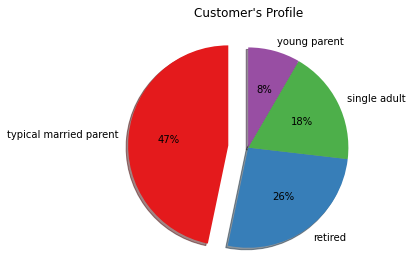

In [34]:
# Pie chart
myexplode = [0.2, 0, 0, 0]
Customer_profile_pie = final_df['customer_profile'].value_counts().plot(kind='pie',startangle=90,autopct = '%1.0f%%',shadow=True,ylabel='',explode=myexplode,colors = sns.color_palette("Set1")) 

Customer_profile_pie.set_title("Customer's Profile")
plt.tight_layout()

Customer_profile_pie.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'customer_profile_pie.png'))

In [35]:
# Customer Profile with income
final_df.loc[final_df['age'] >=65,'customer_profile_income'] = 'retired'

final_df.loc[(final_df['age'] <65) & (final_df['family_status'] != 'married') & (final_df['n_dependants'] == 0) & (final_df['income'] < 50000),'customer_profile_income'] = 'single, low income'
final_df.loc[(final_df['age'] <65) & (final_df['family_status'] != 'married') & (final_df['n_dependants'] == 0) & (final_df['income'] >= 50000) & (final_df['income'] < 100000),'customer_profile_income'] = 'single, low/middle income'
final_df.loc[(final_df['age'] <65) & (final_df['family_status'] != 'married') & (final_df['n_dependants'] == 0) & (final_df['income'] >= 100000) & (final_df['income'] < 150000),'customer_profile_income'] = 'single, middle/high income'
final_df.loc[(final_df['age'] <65) & (final_df['family_status'] != 'married') & (final_df['n_dependants'] == 0) & (final_df['income'] >= 150000),'customer_profile_income'] = 'single, high income'

final_df.loc[(final_df['age'] <65) & (final_df['family_status'] == 'married') & (final_df['n_dependants'] != 0) & (final_df['income'] < 50000),'customer_profile_income'] = 'married, low income'
final_df.loc[(final_df['age'] <65) & (final_df['family_status'] == 'married') & (final_df['n_dependants'] != 0) & (final_df['income'] >= 50000) & (final_df['income'] < 100000),'customer_profile_income'] = 'married, low/middle income'
final_df.loc[(final_df['age'] <65) & (final_df['family_status'] == 'married') & (final_df['n_dependants'] != 0) & (final_df['income'] >= 100000) & (final_df['income'] < 150000),'customer_profile_income'] = 'married, middle/high income'
final_df.loc[(final_df['age'] <65) & (final_df['family_status'] == 'married') & (final_df['n_dependants'] != 0) & (final_df['income'] >= 150000),'customer_profile_income'] = 'married, high income'

final_df.loc[(final_df['age'] >= 18)& (final_df['age'] <=24) & (final_df['n_dependants'] != 0) & (final_df['income'] < 50000),'customer_profile_income'] = 'young parent, low income'
final_df.loc[(final_df['age'] >= 18)& (final_df['age'] <=24) & (final_df['n_dependants'] != 0) & (final_df['income'] >= 50000) & (final_df['income'] < 100000),'customer_profile_income'] = 'young parent, low/middle income'
final_df.loc[(final_df['age'] >= 18)& (final_df['age'] <=24) & (final_df['n_dependants'] != 0) & (final_df['income'] >= 100000) & (final_df['income'] < 150000),'customer_profile_income'] = 'young parent, middle/high income'
final_df.loc[(final_df['age'] >= 18)& (final_df['age'] <=24) & (final_df['n_dependants'] != 0) & (final_df['income'] >= 150000),'customer_profile_income'] = 'young parent, high income'

In [36]:
final_df['customer_profile_income'].value_counts(dropna = False)

retired                             7738154
married, low/middle income          6255976
married, middle/high income         4276528
single, low/middle income           2719450
young parent, low/middle income     2013792
married, high income                1624932
married, low income                 1517459
single, middle/high income          1456597
single, low income                   649284
single, high income                  570784
young parent, low income             366437
young parent, middle/high income      54487
young parent, high income             22514
Name: customer_profile_income, dtype: int64

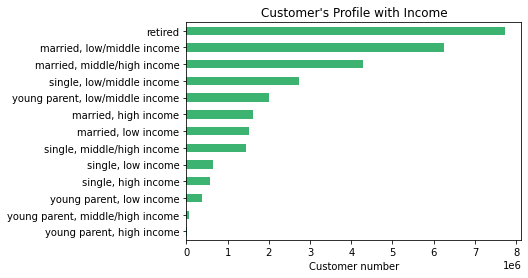

In [37]:
# column chart
Customer_profile_income_hbar = final_df['customer_profile_income'].value_counts().sort_values(ascending=True).plot.barh(color = ['mediumseagreen'])

Customer_profile_income_hbar.set_title("Customer's Profile with Income")
plt.xlabel("Customer number")
plt.ylabel("")


Customer_profile_income_hbar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'customer_profile_income_hbar.png'))

#### Department

In [38]:
# Descriptive Analysis of department
final_df['department'].value_counts(dropna = False)

produce            8586351
dairy eggs         4887596
snacks             2616075
beverages          2430657
frozen             2006425
pantry             1683753
bakery             1059826
canned goods        956832
deli                948799
dry goods pasta     777804
household           660042
meat seafood        639068
breakfast           632755
personal care       399661
babies              387739
international       242099
alcohol             137942
pets                 87853
missing              61282
other                32275
bulk                 31560
Name: department, dtype: int64

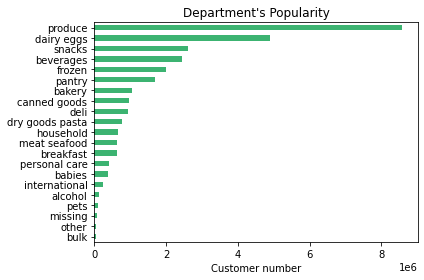

In [39]:
# Bar chart
Department_hbar = final_df['department'].value_counts().sort_values(ascending=True).plot.barh(color = ['mediumseagreen'])

Department_hbar.set_title("Department's Popularity")
plt.xlabel("Customer number")
plt.ylabel("")
plt.tight_layout()

Department_hbar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'Department_hbar.png'))

In [40]:
# In order to seperate top 5 departments from the others, which can help marketing team focus on the most popular departments
final_df.loc[(final_df['department']=='produce'),'Department Popularity'] = 'Top' 
final_df.loc[(final_df['department']=='dairy eggs'),'Department Popularity'] = 'Top'           
final_df.loc[(final_df['department']=='snacks'),'Department Popularity'] = 'Top'              
final_df.loc[(final_df['department']=='beverages'),'Department Popularity'] = 'Top'              
final_df.loc[(final_df['department']=='frozen'),'Department Popularity'] = 'Top' 

In [41]:
# Check the result
final_df['Department Popularity'].value_counts(dropna =False)

Top    20527104
NaN     8739290
Name: Department Popularity, dtype: int64

In [42]:
# Replace NaN with Normal to seperate the departments
final_df['Department Popularity'].fillna('Normal',inplace =True)

In [43]:
final_df['Department Popularity'].value_counts(dropna =False)

Top       20527104
Normal     8739290
Name: Department Popularity, dtype: int64

In [44]:
# Create a subset only containing top 5 departments

In [45]:
popular_departments = final_df[final_df['Department Popularity']=='Top']

In [46]:
popular_departments.head()

,user_id,gender,state,age,n_dependants,family_status,income,order_id,order_number,orders_day_of_week,...,frequency,frequency_flag,region,activity_flag,department,age_group,income_group,customer_profile,customer_profile_income,Department Popularity
0,26711,Female,Missouri,48,3,married,165665,2543867,5,1,...,19.0,Regular customer,Midwest,normal_activity,beverages,45-54,high >150K,typical married parent,"married, high income",Top
1,26711,Female,Missouri,48,3,married,165665,1285508,7,5,...,19.0,Regular customer,Midwest,normal_activity,beverages,45-54,high >150K,typical married parent,"married, high income",Top
2,26711,Female,Missouri,48,3,married,165665,2578584,8,1,...,19.0,Regular customer,Midwest,normal_activity,beverages,45-54,high >150K,typical married parent,"married, high income",Top
3,33890,Female,New Mexico,36,0,single,59285,1044841,3,6,...,26.0,Non-frequent customer,West,normal_activity,beverages,35-44,low/middle 50-100K,single adult,"single, low/middle income",Top
4,33890,Female,New Mexico,36,0,single,59285,474720,4,1,...,26.0,Non-frequent customer,West,normal_activity,beverages,35-44,low/middle 50-100K,single adult,"single, low/middle income",Top


#### Product

In [47]:
final_df.head()

,user_id,gender,state,age,n_dependants,family_status,income,order_id,order_number,orders_day_of_week,...,frequency,frequency_flag,region,activity_flag,department,age_group,income_group,customer_profile,customer_profile_income,Department Popularity
0,26711,Female,Missouri,48,3,married,165665,2543867,5,1,...,19.0,Regular customer,Midwest,normal_activity,beverages,45-54,high >150K,typical married parent,"married, high income",Top
1,26711,Female,Missouri,48,3,married,165665,1285508,7,5,...,19.0,Regular customer,Midwest,normal_activity,beverages,45-54,high >150K,typical married parent,"married, high income",Top
2,26711,Female,Missouri,48,3,married,165665,2578584,8,1,...,19.0,Regular customer,Midwest,normal_activity,beverages,45-54,high >150K,typical married parent,"married, high income",Top
3,33890,Female,New Mexico,36,0,single,59285,1044841,3,6,...,26.0,Non-frequent customer,West,normal_activity,beverages,35-44,low/middle 50-100K,single adult,"single, low/middle income",Top
4,33890,Female,New Mexico,36,0,single,59285,474720,4,1,...,26.0,Non-frequent customer,West,normal_activity,beverages,35-44,low/middle 50-100K,single adult,"single, low/middle income",Top


In [48]:
Sales_by_product_name = final_df.groupby('product_name').agg({'prices' : ['sum']})

In [49]:
Sales_by_product_name.to_clipboard()

I used filter in Excel to put products in order. Some products are sold better than the others as we can find in the Excel file (Product Sales Revenue).

In [50]:
# Check if there is any characteristic which can be categorized. 

In [51]:
pd.set_option('display.max_columns',None)

In [52]:
final_df.head()

,user_id,gender,state,age,n_dependants,family_status,income,order_id,order_number,orders_day_of_week,order_time_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,spending,spending_flag,frequency,frequency_flag,region,activity_flag,department,age_group,income_group,customer_profile,customer_profile_income,Department Popularity
0,26711,Female,Missouri,48,3,married,165665,2543867,5,1,9,30.0,False,196,2,0,Soda,77,7,9.0,Regularly busy,Busiest days,Average orders,8,New customer,7.988281,Low spender,19.0,Regular customer,Midwest,normal_activity,beverages,45-54,high >150K,typical married parent,"married, high income",Top
1,26711,Female,Missouri,48,3,married,165665,1285508,7,5,15,11.0,False,196,1,1,Soda,77,7,9.0,Regularly busy,Regularly busy,Most orders,8,New customer,7.988281,Low spender,19.0,Regular customer,Midwest,normal_activity,beverages,45-54,high >150K,typical married parent,"married, high income",Top
2,26711,Female,Missouri,48,3,married,165665,2578584,8,1,15,10.0,False,196,2,1,Soda,77,7,9.0,Regularly busy,Busiest days,Most orders,8,New customer,7.988281,Low spender,19.0,Regular customer,Midwest,normal_activity,beverages,45-54,high >150K,typical married parent,"married, high income",Top
3,33890,Female,New Mexico,36,0,single,59285,1044841,3,6,11,30.0,False,196,1,0,Soda,77,7,9.0,Regularly busy,Regularly busy,Most orders,12,Regular customer,7.058594,Low spender,26.0,Non-frequent customer,West,normal_activity,beverages,35-44,low/middle 50-100K,single adult,"single, low/middle income",Top
4,33890,Female,New Mexico,36,0,single,59285,474720,4,1,20,16.0,False,196,6,1,Soda,77,7,9.0,Regularly busy,Busiest days,Average orders,12,Regular customer,7.058594,Low spender,26.0,Non-frequent customer,West,normal_activity,beverages,35-44,low/middle 50-100K,single adult,"single, low/middle income",Top


In [53]:
# Change the orders_day_of_week to make it more clear and visible

In [54]:
final_df['orders_day_of_week'].value_counts()

0    5584939
1    5119534
6    4053142
5    3813081
2    3804785
3    3465892
4    3425021
Name: orders_day_of_week, dtype: int64

In [55]:
# Create ordering_day_of_week by loc functions
final_df.loc[final_df['orders_day_of_week'] == 0, 'ordering_day_of_week'] = 'Saturday'
final_df.loc[final_df['orders_day_of_week'] == 1, 'ordering_day_of_week'] = 'Sunday'
final_df.loc[final_df['orders_day_of_week'] == 2, 'ordering_day_of_week'] = 'Monday'
final_df.loc[final_df['orders_day_of_week'] == 3, 'ordering_day_of_week'] = 'Tuesday'
final_df.loc[final_df['orders_day_of_week'] == 4, 'ordering_day_of_week'] = 'Wednesday'
final_df.loc[final_df['orders_day_of_week'] == 5, 'ordering_day_of_week'] = 'Thursday'
final_df.loc[final_df['orders_day_of_week'] == 6, 'ordering_day_of_week'] = 'Friday'

In [56]:
final_df.head()

,user_id,gender,state,age,n_dependants,family_status,income,order_id,order_number,orders_day_of_week,order_time_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,spending,spending_flag,frequency,frequency_flag,region,activity_flag,department,age_group,income_group,customer_profile,customer_profile_income,Department Popularity,ordering_day_of_week
0,26711,Female,Missouri,48,3,married,165665,2543867,5,1,9,30.0,False,196,2,0,Soda,77,7,9.0,Regularly busy,Busiest days,Average orders,8,New customer,7.988281,Low spender,19.0,Regular customer,Midwest,normal_activity,beverages,45-54,high >150K,typical married parent,"married, high income",Top,Sunday
1,26711,Female,Missouri,48,3,married,165665,1285508,7,5,15,11.0,False,196,1,1,Soda,77,7,9.0,Regularly busy,Regularly busy,Most orders,8,New customer,7.988281,Low spender,19.0,Regular customer,Midwest,normal_activity,beverages,45-54,high >150K,typical married parent,"married, high income",Top,Thursday
2,26711,Female,Missouri,48,3,married,165665,2578584,8,1,15,10.0,False,196,2,1,Soda,77,7,9.0,Regularly busy,Busiest days,Most orders,8,New customer,7.988281,Low spender,19.0,Regular customer,Midwest,normal_activity,beverages,45-54,high >150K,typical married parent,"married, high income",Top,Sunday
3,33890,Female,New Mexico,36,0,single,59285,1044841,3,6,11,30.0,False,196,1,0,Soda,77,7,9.0,Regularly busy,Regularly busy,Most orders,12,Regular customer,7.058594,Low spender,26.0,Non-frequent customer,West,normal_activity,beverages,35-44,low/middle 50-100K,single adult,"single, low/middle income",Top,Friday
4,33890,Female,New Mexico,36,0,single,59285,474720,4,1,20,16.0,False,196,6,1,Soda,77,7,9.0,Regularly busy,Busiest days,Average orders,12,Regular customer,7.058594,Low spender,26.0,Non-frequent customer,West,normal_activity,beverages,35-44,low/middle 50-100K,single adult,"single, low/middle income",Top,Sunday


In [57]:
# Exporting
final_df.to_pickle(os.path.join(path,'02 Data','Prepared Data','merge_with_customer_profile.pkl'))